**About the task**

The objective of the task is to perform Explanatory Data Analysis (EDA) for recognition information in the dataset (understand the pricing strategy of the mobile phone market).

Assumptions:

• Pandas and Numpy module to make descriptive statistics for each variable;</br>
• Pandas module to recognize the relationship between variables (calculation statistics in subgroups and pivot tables);</br>
• visualization the distribution of the target variable, empirical distributions of the explanatory variables using the Matplotlib package.

Source data: https://www.kaggle.com/iabhishekofficial/mobile-price-classification

**1. Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

**2. Basic analysis of the dataset**

In [2]:
# Import the dataset
mp = pd.read_csv('/content/drive/MyDrive/Upublicznione/mobile-price-classification_train.csv')

In [3]:
# Checking the size of the dataset
mp.shape

(2000, 21)

In [11]:
# Checking 5 first rows of the dataset
mp.head(15)

,Battery power,Bluetooth,Clock speed,Dual SIM,Front Camera,4G,Internal Memory,Mobile Depth,Mobile Weight,Number of cores,...,Pixel Height,Pixel Width,RAM,Screen Height,Screen Weight,Talk Time,3G,Touch Screen,WiFi,Price range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [12]:
# Renaming the column names
mp = mp.rename(columns={
"battery_power": "Battery power",
"blue":"Bluetooth",
"clock_speed": "Clock speed",
"dual_sim": "Dual SIM",
"fc": "Front Camera",
"four_g": "4G",
"int_memory": "Internal Memory",
"m_dep": "Mobile Depth",
"mobile_wt": "Mobile Weight",
"n_cores": "Number of cores",
"pc": "Primary Camera",
"px_height": "Pixel Height",
"px_width": "Pixel Width",
"ram":"RAM",
"sc_h": "Screen Height",
"sc_w":"Screen Weight",
"talk_time":"Talk Time",
"three_g":"3G",
"touch_screen":"Touch Screen",
"wifi": "WiFi",
"price_range": "Price range"
})

In [14]:
# Checking the new columns names
mp.columns

Index(['Battery power', 'Bluetooth', 'Clock speed', 'Dual SIM', 'Front Camera',
       '4G', 'Internal Memory', 'Mobile Depth', 'Mobile Weight',
       'Number of cores', 'Primary Camera', 'Pixel Height', 'Pixel Width',
       'RAM', 'Screen Height', 'Screen Weight', 'Talk Time', '3G',
       'Touch Screen', 'WiFi', 'Price range'],
      dtype='object')

In [7]:
# Checking the datatypes
mp.dtypes

Battery power        int64
Bluetooth            int64
Clock speed        float64
Dual SIM             int64
Front Camera         int64
4G                   int64
Internal Memory      int64
Mobile Depth       float64
Mobile Weight        int64
Number of cores      int64
Primary Camera       int64
Pixel Height         int64
Pixel Width          int64
RAM                  int64
Screen Height        int64
Screen Weight        int64
Talk Time            int64
3G                   int64
Touch Screen         int64
WiFi                 int64
Price range          int64
dtype: object

In [8]:
# Checking if the values are complete in the dataset
# The result will be sum of missing values for whole dataframe
s = mp.isnull().sum() 
s.sum()

0

In [9]:
# Descriptive statistics for each variable
mp.describe()

,Battery power,Bluetooth,Clock speed,Dual SIM,Front Camera,4G,Internal Memory,Mobile Depth,Mobile Weight,Number of cores,...,Pixel Height,Pixel Width,RAM,Screen Height,Screen Weight,Talk Time,3G,Touch Screen,WiFi,Price range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


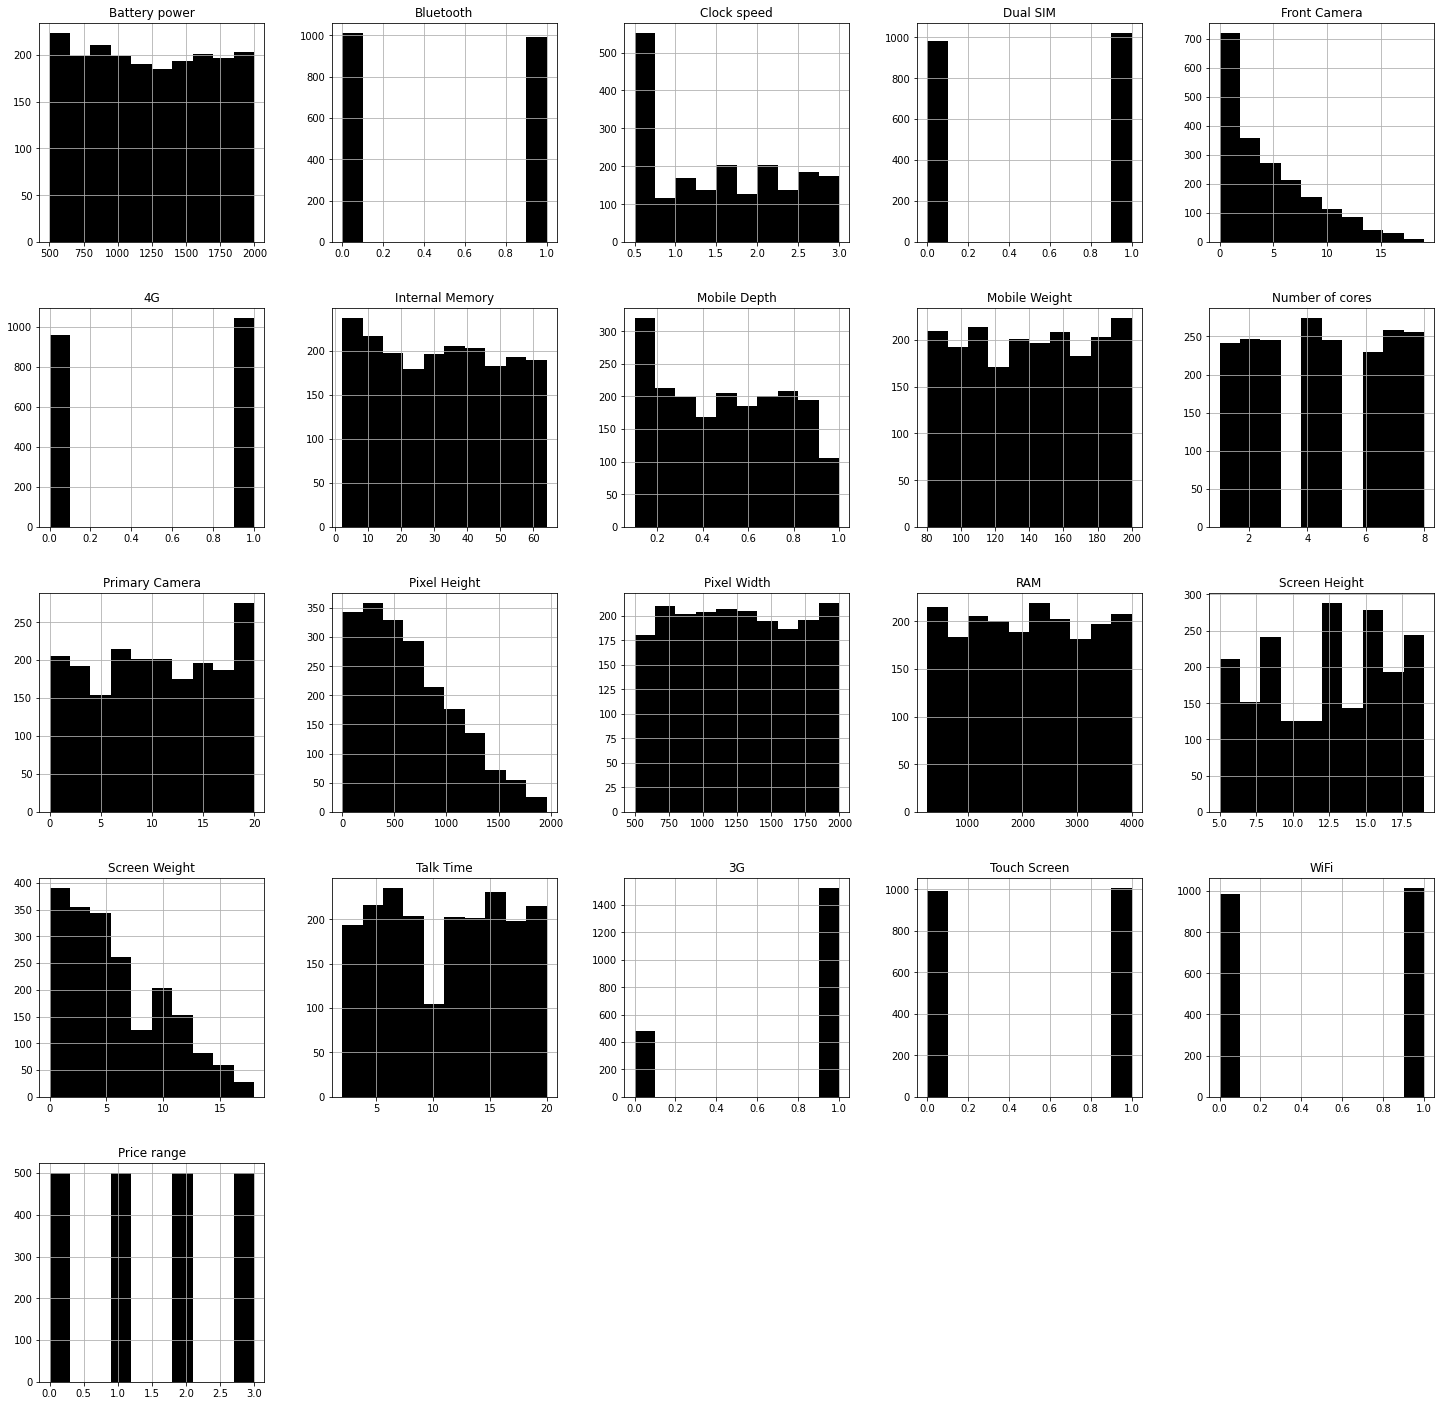

In [10]:
# Histogram for each variable
mp.hist(figsize=(25,25), color = 'black')
plt.show()

In [15]:
# New_mp is a dataset without outlier columns: 'blue', 'dual_sim', 'four_g','three_g','touch_screen', 'wifi', 'price_range'.
new_mp = mp.drop(['Bluetooth', 'Dual SIM', '4G','3G','Touch Screen', 'WiFi', 'Price range'], axis=1)
new_mp.head()

,Battery power,Clock speed,Front Camera,Internal Memory,Mobile Depth,Mobile Weight,Number of cores,Primary Camera,Pixel Height,Pixel Width,RAM,Screen Height,Screen Weight,Talk Time
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15


**Outlier columns analysis**

In [16]:
# Out_only is a dataset with outlier columns.
out_only = mp[['Bluetooth', 'Dual SIM', '4G','3G','Touch Screen', 'WiFi']]
out_only.head()

,Bluetooth,Dual SIM,4G,3G,Touch Screen,WiFi
0,0,0,0,0,0,1
1,1,1,1,1,1,0
2,1,1,1,1,1,0
3,1,0,0,1,0,0
4,1,0,1,1,1,0


In [17]:
# Value counts of out_only columns.

param = ['Bluetooth', 'Dual SIM', '4G','3G','Touch Screen', 'WiFi']
pd.set_option('display.float_format', '{:.2%}'.format)

for i in param:
    result = mp[i].value_counts(normalize = True)
    print (result)
    print ('\n')

0   50.50%
1   49.50%
Name: Bluetooth, dtype: float64


1   50.95%
0   49.05%
Name: Dual SIM, dtype: float64


1   52.15%
0   47.85%
Name: 4G, dtype: float64


1   76.15%
0   23.85%
Name: 3G, dtype: float64


1   50.30%
0   49.70%
Name: Touch Screen, dtype: float64


1   50.70%
0   49.30%
Name: WiFi, dtype: float64




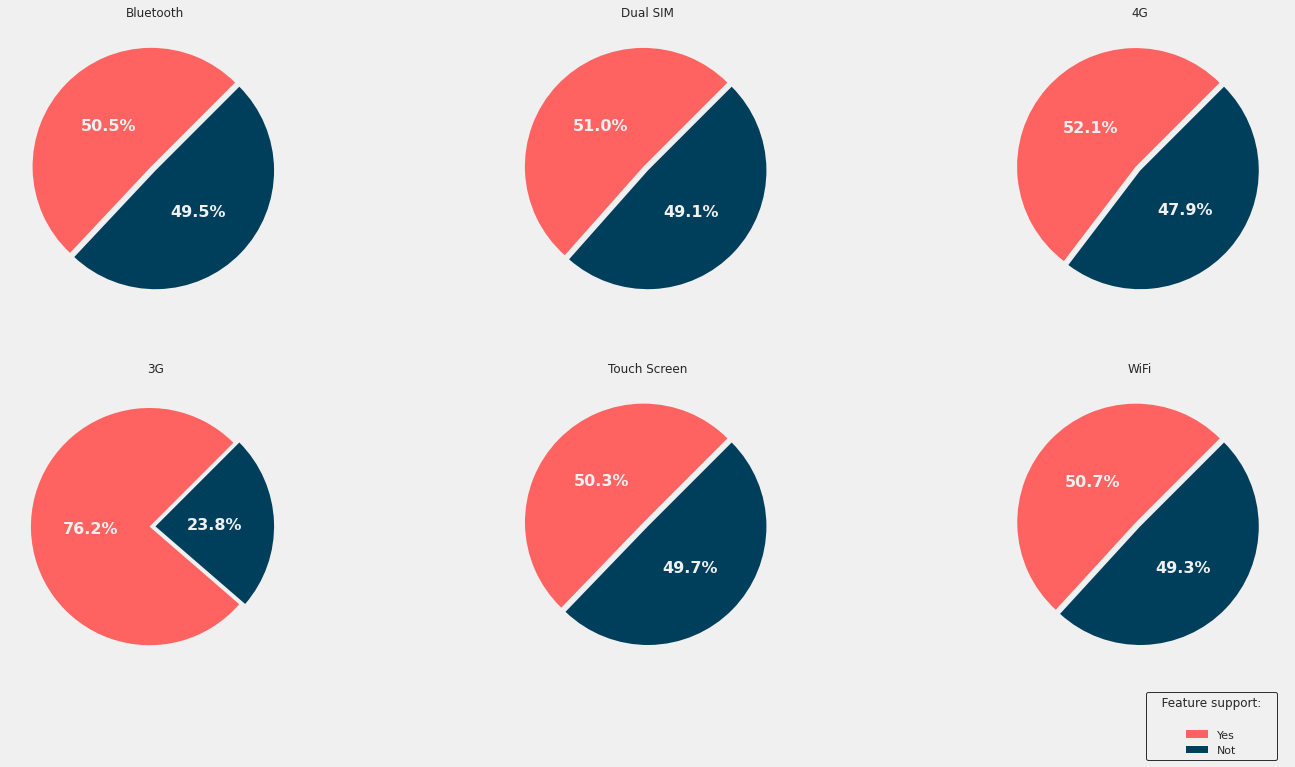

In [220]:
yn = ["Yes",'Not']
n = len(param)
l =[]

for x in range(n):
  l.append(x)


fig, axes = plt.subplots(2,3, figsize=(25, 12))
axe = axes.ravel()

fig.patch.set_facecolor('#F0F0F0')

for i, x in enumerate(param):
  mp[x].value_counts().plot.pie (
      ax = axe[i],
      autopct='%1.1f%%',
      explode = (0.05, 0),
      pctdistance = 0.5,
      colors = ['#ff6361','#003f5c'],
      startangle = 45,
      textprops = {"fontsize":16, 'fontweight':'bold', 'color':'#F0F0F0'}
  )

axe[0].title.set_text('Bluetooth')
axe[1].title.set_text('Dual SIM')
axe[2].title.set_text('4G')
axe[3].title.set_text('3G')
axe[4].title.set_text('Touch Screen')
axe[5].title.set_text('WiFi')


for i in range (n):
  axe[i].set_ylabel('')

plt.legend(title = "   Feature support:   " + "\n", 
           loc='upper left', 
           labels=yn, 
           bbox_to_anchor=(0.5, -0.04),
           facecolor = '#F0F0F0',
           edgecolor = 'black')

plt.show()

**Explanatory variable analysis**

In [63]:
# The size of the grouped price_range variable
prGr = mp.groupby(['Price range'])
prGr.size()

Price range
0    500
1    500
2    500
3    500
dtype: int64

In [65]:
# Average values of variables for the grouped price_range variable
prGr.mean()

,Battery power,Bluetooth,Clock speed,Dual SIM,Front Camera,4G,Internal Memory,Mobile Depth,Mobile Weight,Number of cores,Primary Camera,Pixel Height,Pixel Width,RAM,Screen Height,Screen Weight,Talk Time,3G,Touch Screen,WiFi
Price range,,,,,,,,,,,,,,,,,,,,
0,111690.20%,48.60%,155.02%,50.00%,408.40%,51.80%,3117.40%,49.02%,14055.20%,460.00%,957.40%,53640.80%,115027.00%,78531.40%,1232.40%,568.20%,1061.20%,74.60%,52.40%,49.60%
1,122886.80%,49.00%,148.86%,51.00%,434.00%,52.40%,3211.60%,52.40%,14051.00%,429.80%,992.40%,66689.20%,125190.80%,167949.00%,1221.20%,554.40%,1136.20%,75.60%,52.20%,50.40%
2,122832.00%,48.60%,152.98%,49.80%,449.80%,49.40%,3092.00%,49.08%,14361.40%,468.20%,1001.80%,63228.40%,123404.60%,258281.60%,1201.00%,571.40%,1097.20%,77.40%,47.00%,50.40%
3,137998.40%,51.80%,152.04%,53.00%,431.60%,55.00%,3397.60%,50.20%,13632.00%,450.20%,1015.00%,74484.80%,136983.80%,344923.20%,1268.00%,612.80%,1109.80%,77.00%,49.60%,52.40%


**The correlation analysis**

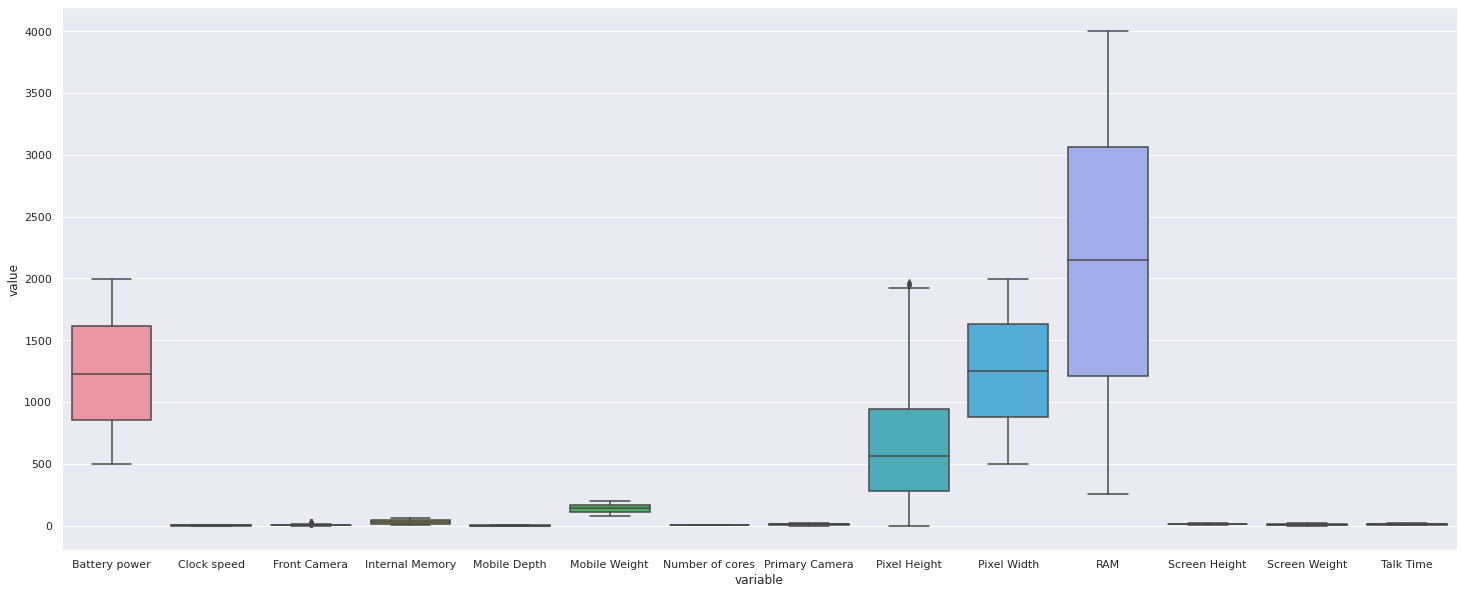

In [223]:
fig, ax = plt.subplots(figsize =(25,10))
sns.set(style="darkgrid")
sns.boxplot(x="variable", y="value", data=pd.melt(new_mp), orient ='v')

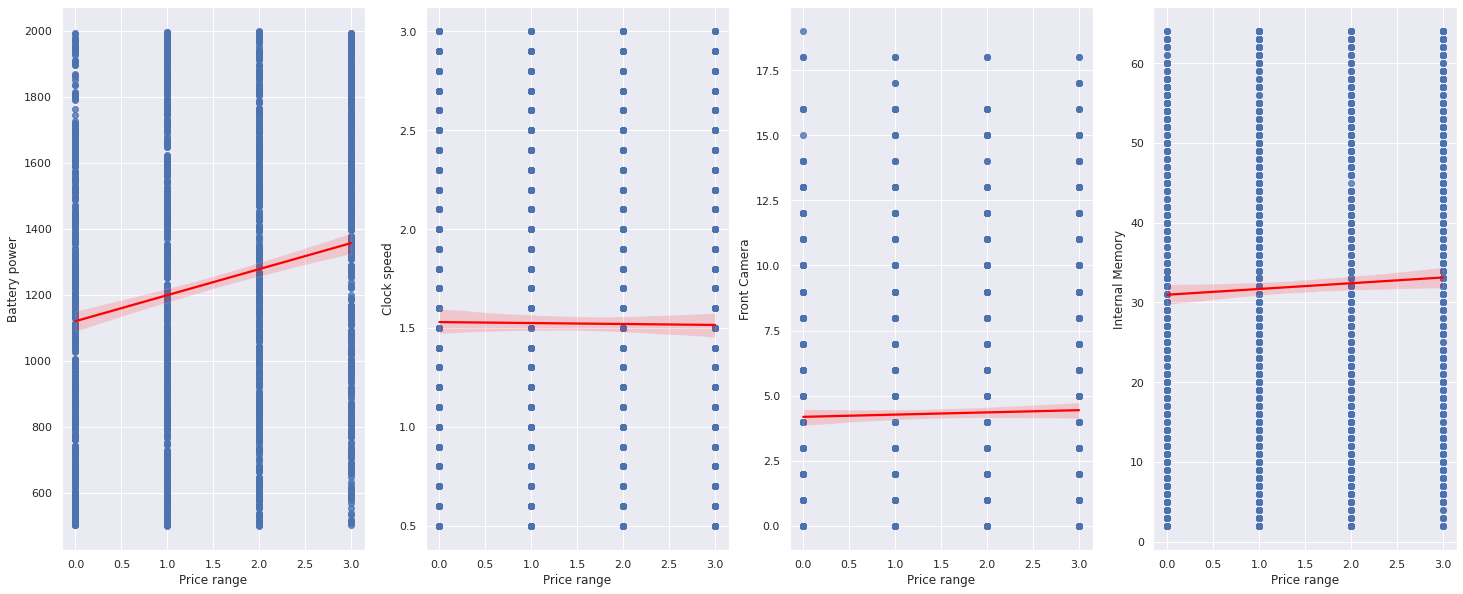

In [225]:
fig,(ax1, ax2, ax3, ax4) = plt.subplots(ncols=4)
fig.set_size_inches(25, 10)

cols = new_mp.columns.tolist()
cols = cols[0:4]
ax = [ax1,ax2,ax3,ax4]

sns.set_theme(color_codes=True)

for i in range(len(cols)):
    sns.regplot(y = cols[i], x = "Price range", data = mp, ax = ax[i], line_kws = {'color' : 'red'})

plt.show()

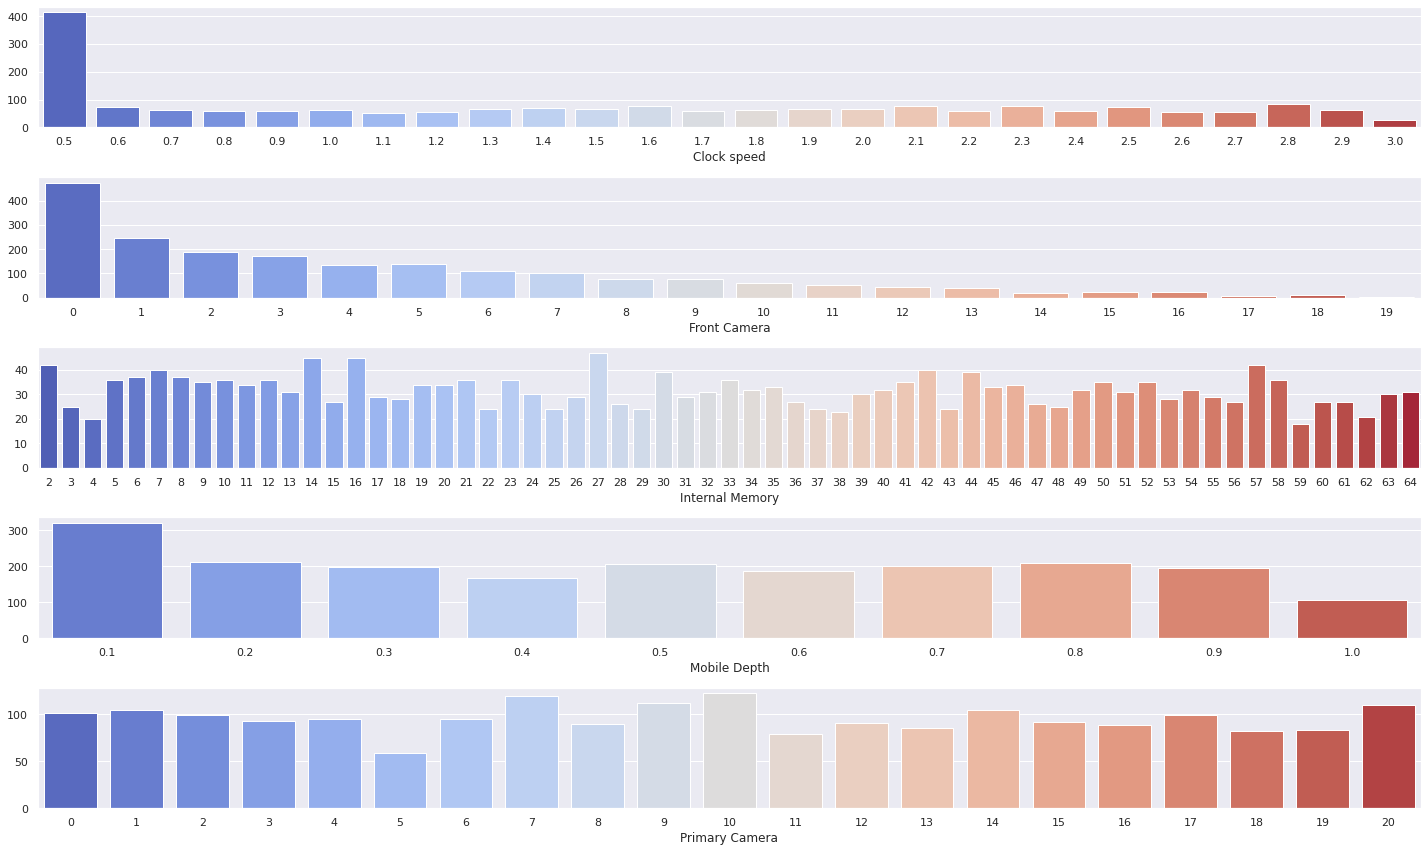

In [217]:
cols = new_mp.columns.tolist()
axe = [ax1, ax2, ax3, ax4, ax5]
n = len(axe)

fig,(ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=n)

fig.set_size_inches(20, 12)
sns.set_style('darkgrid')
	
sns.set_context("notebook")
sns.countplot(x = cols[1], data = mp, ax=ax1, palette = 'coolwarm')
sns.countplot(x = cols[2], data = mp, ax=ax2, palette = 'coolwarm')
sns.countplot(x = cols[3], data = mp, ax=ax3, palette = 'coolwarm')
sns.countplot(x = cols[4], data = mp, ax=ax4, palette = 'coolwarm')
sns.countplot(x = cols[7], data = mp, ax=ax5, palette = 'coolwarm')

ax1.set_ylabel('')
ax2.set_ylabel('')
ax3.set_ylabel('')
ax4.set_ylabel('')
ax5.set_ylabel('')

plt.rcParams["patch.force_edgecolor"] = False
plt.tight_layout()
plt.show()

In [183]:
# The correlation between variables using the standard correlation coefficient (Pearson method).
mpc = mp.corr(method ='pearson')
mpc

,Battery power,Bluetooth,Clock speed,Dual SIM,Front Camera,4G,Internal Memory,Mobile Depth,Mobile Weight,Number of cores,...,Pixel Height,Pixel Width,RAM,Screen Height,Screen Weight,Talk Time,3G,Touch Screen,WiFi,Price range
Battery power,100.00%,1.13%,1.15%,-4.18%,3.33%,1.57%,-0.40%,3.41%,0.18%,-2.97%,...,1.49%,-0.84%,-0.07%,-3.00%,-2.14%,5.25%,1.15%,-1.05%,-0.83%,20.07%
Bluetooth,1.13%,100.00%,2.14%,3.52%,0.36%,1.34%,4.12%,0.40%,-0.86%,3.62%,...,-0.69%,-4.15%,2.64%,-0.30%,0.06%,1.39%,-3.02%,1.01%,-2.19%,2.06%
Clock speed,1.15%,2.14%,100.00%,-0.13%,-0.04%,-4.31%,0.65%,-1.44%,1.23%,-0.57%,...,-1.45%,-0.95%,0.34%,-2.91%,-0.74%,-1.14%,-4.64%,1.98%,-2.45%,-0.66%
Dual SIM,-4.18%,3.52%,-0.13%,100.00%,-2.91%,0.32%,-1.57%,-2.21%,-0.90%,-2.47%,...,-2.09%,1.43%,4.11%,-1.19%,-1.67%,-3.94%,-1.40%,-1.71%,2.27%,1.74%
Front Camera,3.33%,0.36%,-0.04%,-2.91%,100.00%,-1.66%,-2.91%,-0.18%,2.36%,-1.34%,...,-1.00%,-0.52%,1.51%,-1.10%,-1.24%,-0.68%,0.18%,-1.48%,2.01%,2.20%
4G,1.57%,1.34%,-4.31%,0.32%,-1.66%,100.00%,0.87%,-0.18%,-1.65%,-2.97%,...,-1.92%,0.74%,0.73%,2.72%,3.70%,-4.66%,58.42%,1.68%,-1.76%,1.48%
Internal Memory,-0.40%,4.12%,0.65%,-1.57%,-2.91%,0.87%,100.00%,0.69%,-3.42%,-2.83%,...,1.04%,-0.83%,3.28%,3.78%,1.17%,-0.28%,-0.94%,-2.70%,0.70%,4.44%
Mobile Depth,3.41%,0.40%,-1.44%,-2.21%,-0.18%,-0.18%,0.69%,100.00%,2.18%,-0.35%,...,2.53%,2.36%,-0.94%,-2.53%,-1.84%,1.70%,-1.21%,-0.26%,-2.84%,0.09%
Mobile Weight,0.18%,-0.86%,1.23%,-0.90%,2.36%,-1.65%,-3.42%,2.18%,100.00%,-1.90%,...,0.09%,0.01%,-0.26%,-3.39%,-2.08%,0.62%,0.16%,-1.44%,-0.04%,-3.03%
Number of cores,-2.97%,3.62%,-0.57%,-2.47%,-1.34%,-2.97%,-2.83%,-0.35%,-1.90%,100.00%,...,-0.69%,2.45%,0.49%,-0.03%,2.58%,1.31%,-1.47%,2.38%,-1.00%,0.44%


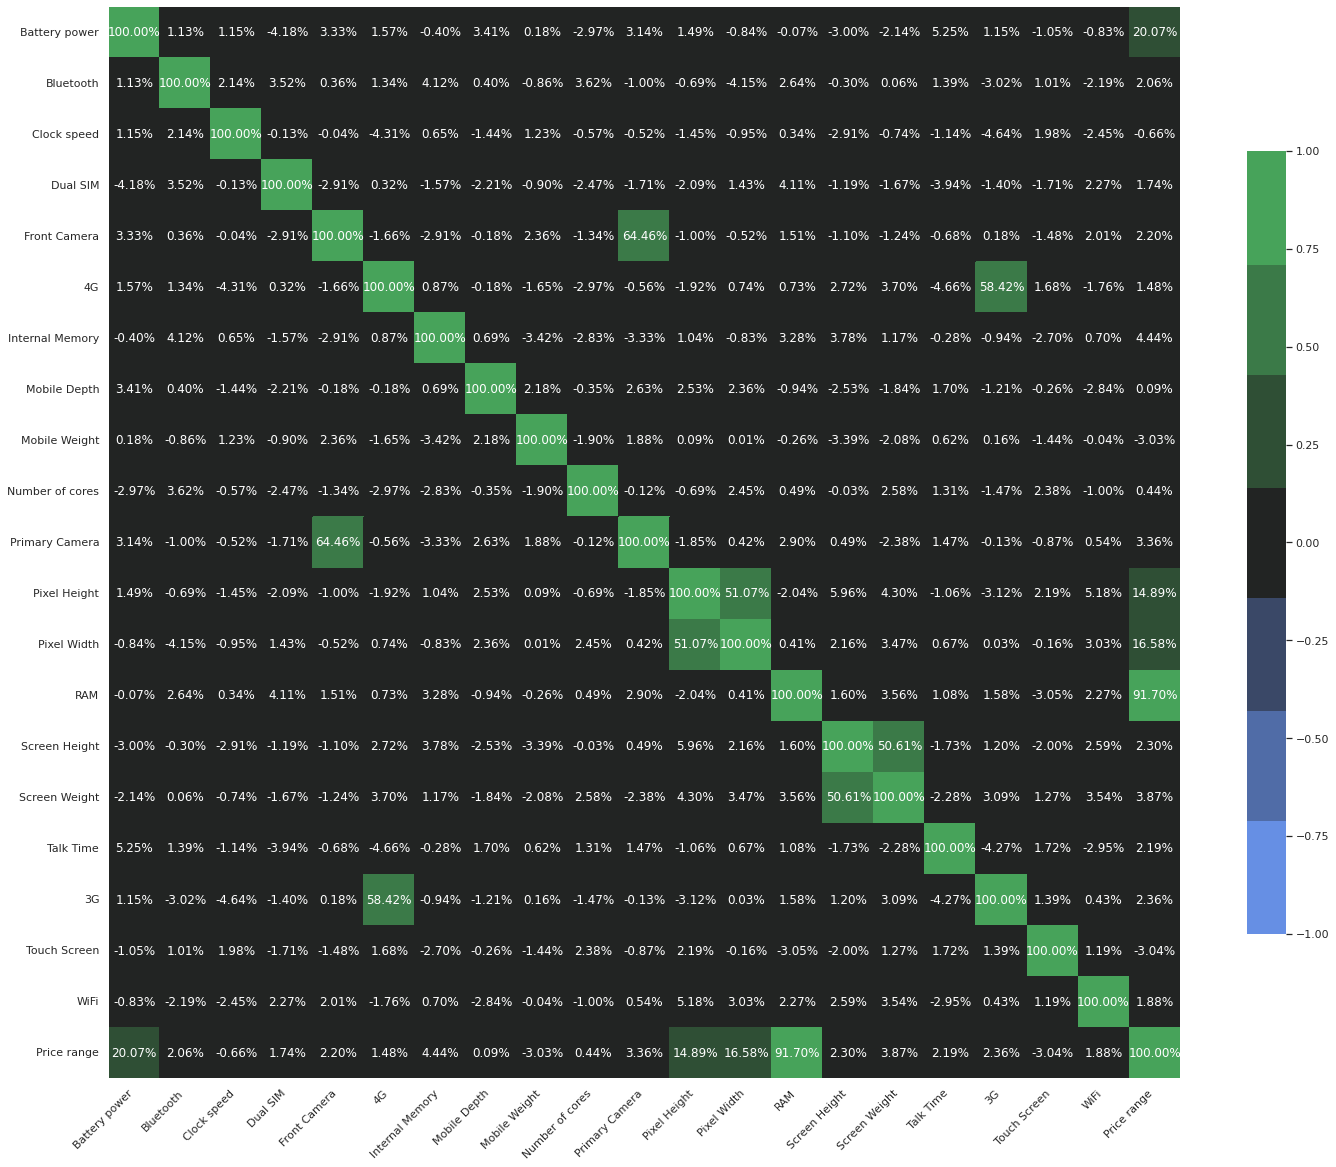

In [186]:
# The heatmap of correlation (Seaborn plot)
ax = plt.subplots(figsize=(24,24))
ax = sns.heatmap(mpc, vmin = -1, vmax=1, center=0, annot=True, fmt=".2%", cmap = sns.diverging_palette(255, 133, l=60, n=7, center="dark"), square = True, cbar_kws={"shrink": .6})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

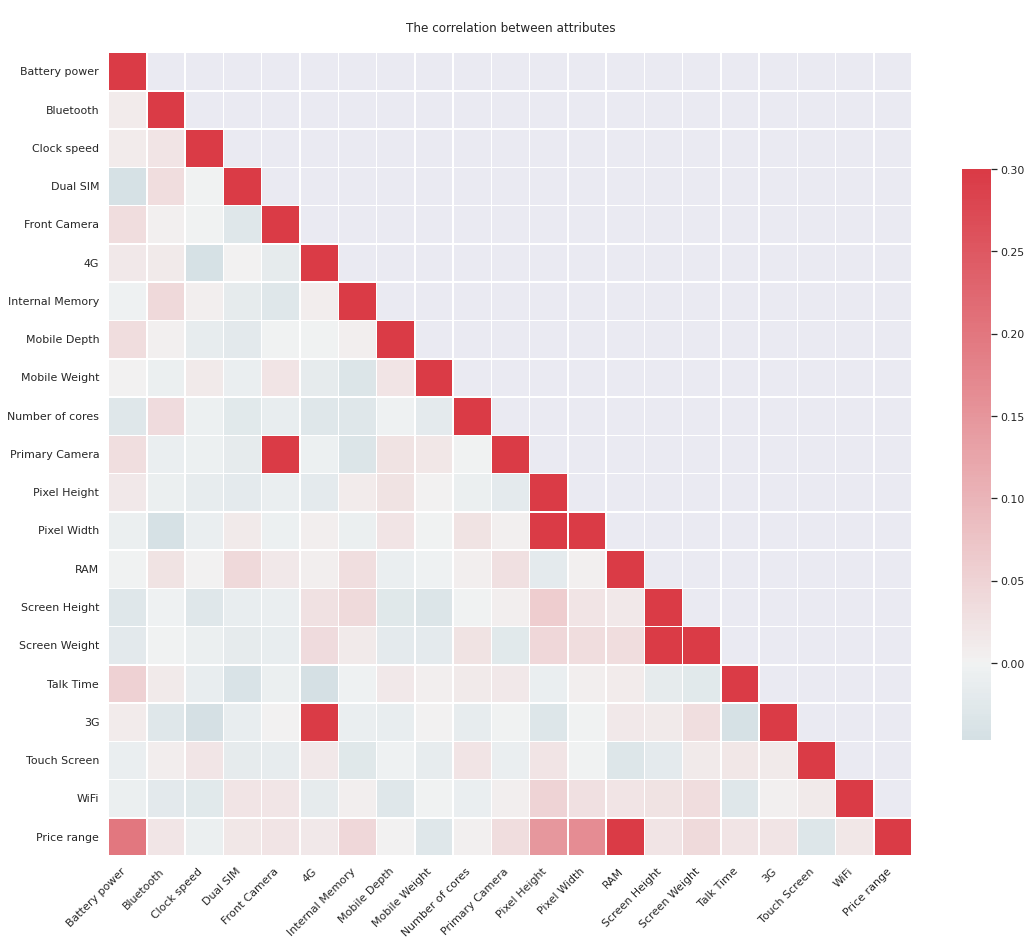

In [187]:
# The heatmap of correlation with a mask (Seaborn plot)
f, ax = plt.subplots(figsize=(18,15))
mask = np.array(mpc)
mask[np.tril_indices_from(mask)] = 0 # Creating the triangular matrix
sns.set(style="white")
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax.title.set_text('\n'+'The correlation between attributes' + '\n')

sns.heatmap(mpc, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .7})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

Text(0.5, 1.0, '\nCorrelation between Price Range and other attributes\n')

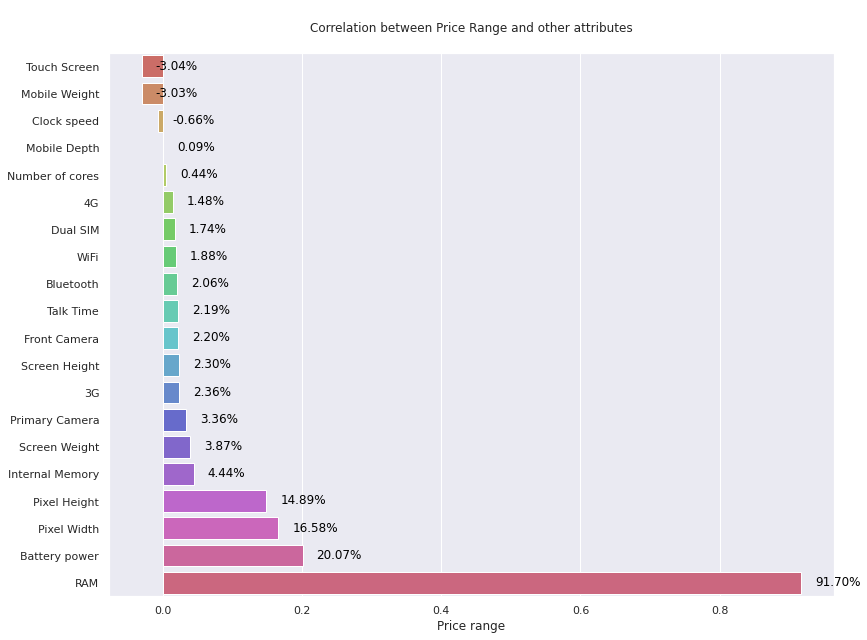

In [194]:
# The correlation between variables and the grouped price_range variable
f, ax = plt.subplots(figsize=(13,10))
sns.set_style('darkgrid')
corr = mpc.corr()
corr = mpc["Price range"]
cr = corr.sort_values(ascending = True)[:-1] # without price_range

sns.barplot(x=cr, y=cr.index, palette = "hls")

for i, v in enumerate(cr):
    ax.text(v + .02, i + .10, "{:.2%}".format(v), color = 'black')
plt.title("\n"+ "Correlation between Price Range and other attributes" +"\n")

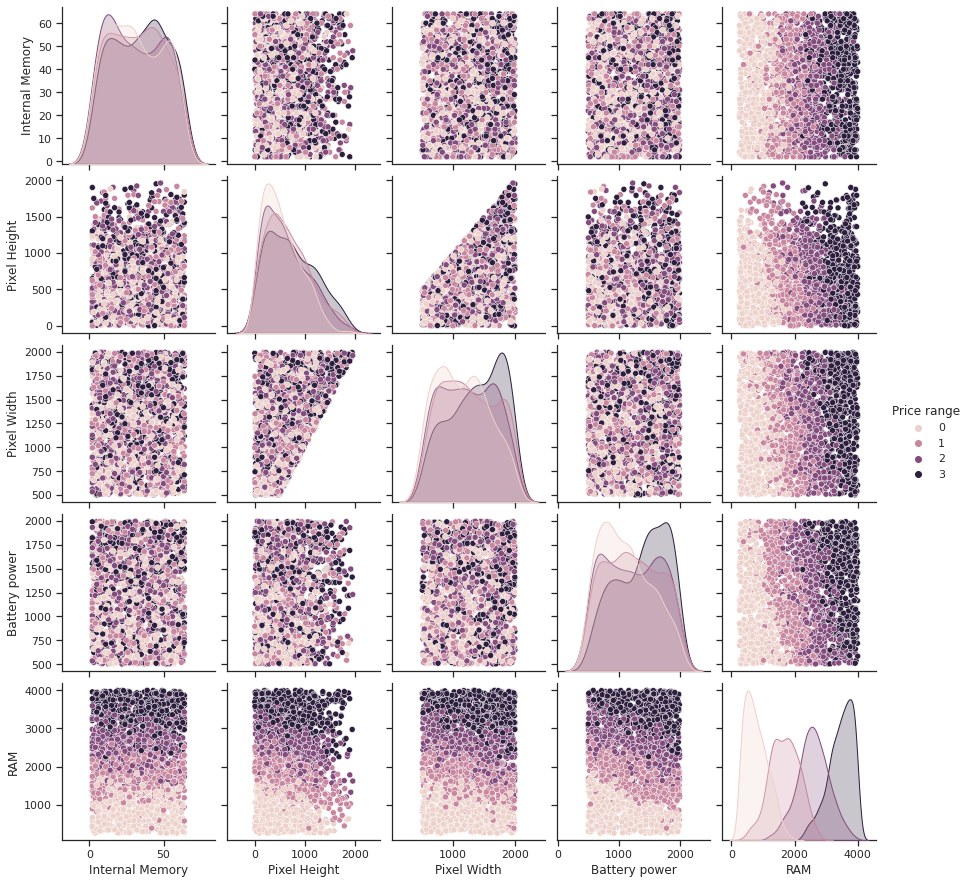

In [195]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(mp, vars = ["Internal Memory", "Pixel Height", "Pixel Width", "Battery power", "RAM"], hue="Price range", diag_kind = "kde")

In [197]:
pr = pd.cut(x = mp['Price range'], bins = [-1,0,1,2,3], labels=['Range 1', 'Range 2', 'Range 3', 'Range 4']).value_counts()
pr

Range 1    500
Range 2    500
Range 3    500
Range 4    500
Name: Price range, dtype: int64

In [198]:
# RAM divided into ranges
ram = pd.cut(x = mp['RAM'], bins = [0, 1024, 2048, 3072, 4096], labels=['< 1GB', '1-2 GB', '2-3 GB', '3-4 GB']).value_counts()
ram.sort_index()

< 1GB     406
1-2 GB    542
2-3 GB    555
3-4 GB    497
Name: RAM, dtype: int64

In [200]:
x = mp.groupby(['RAM']).filter(lambda x: x["Price range"].mean()>=3)

In [ ]:
m = x['ram'].min(axis=0)
n = x['ram'].max(axis=0)

print('The smallest RAM in the maximum price_range: ' + str(m))
print('The biggest RAM in the maximum price_range: ' + str(n))

The smallest RAM in the maximum price_range: 2259
The biggest RAM in the maximum price_range: 3998


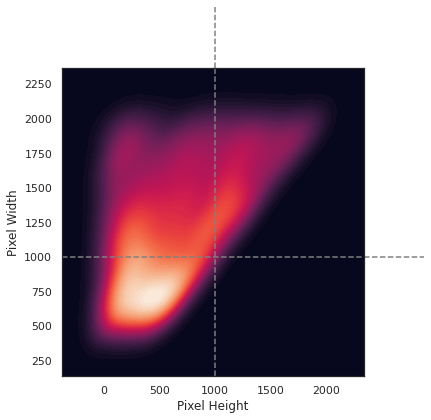

In [204]:
# Grid for drawing a bivariate plot with marginal univariate plots
sns.set_theme(style="white")
g = sns.JointGrid(data=mp, x ="Pixel Height", y = "Pixel Width", space=0)
g.plot_joint(sns.kdeplot,
             fill=True, 
             thresh=0, levels=100, cmap="rocket")

g.refline(x=1000, y=1000)